In [1]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
from matplotlib.colors import LinearSegmentedColormap
import matplotlib.colors as mcolors
import csv

In [2]:
plt.style.use('seaborn')
plt.style.use('seaborn-ticks')
plt.rcParams['font.size'] = '20'
plt.rcParams['figure.figsize'] = (10,6)
plt.rcParams['xtick.labelsize'] = '16'
plt.rcParams['ytick.labelsize'] = '16'  
plt.rcParams['axes.labelsize'] = '18'
plt.rcParams['axes.titlesize'] = '18'
plt.rcParams['figure.edgecolor'] ="black"
plt.rcParams['errorbar.capsize'] =10
plt.rcParams['figure.autolayout']=True
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "sans-serif"
})

/var/folders/lv/st0pk19j1nl0vj5ry67mxbtw0000gn/T/ipykernel_15142/215264835.py:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')
/var/folders/lv/st0pk19j1nl0vj5ry67mxbtw0000gn/T/ipykernel_15142/215264835.py:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-ticks')


In [3]:
cmap = LinearSegmentedColormap.from_list('custom_cmap', [(0, 'darkblue'), (1, 'orange')])
colors = [(0.0, 'blue'), (0.5, 'red'), (1.0, 'yellow')]
custom_cmap = mcolors.LinearSegmentedColormap.from_list('custom_RdYlBu', colors)

# Adding The Data File

In [4]:
filepath = '/Users/saan/Desktop/Academic/Research/Data/Final Data FITS/'
filename = 'GREENLAND_20220302_1737_1758.fit.gz'
hdul = fits.open(filepath+filename)

In [5]:
data = hdul[0].data
freqs = hdul[1].data['frequency'][0]
time = hdul[1].data['time'][0]

print(len(freqs),len(time))

364 5040


# Plotting Noise and Data

[0, 1259.8719999999998, 10.25, 105.81300354003906]


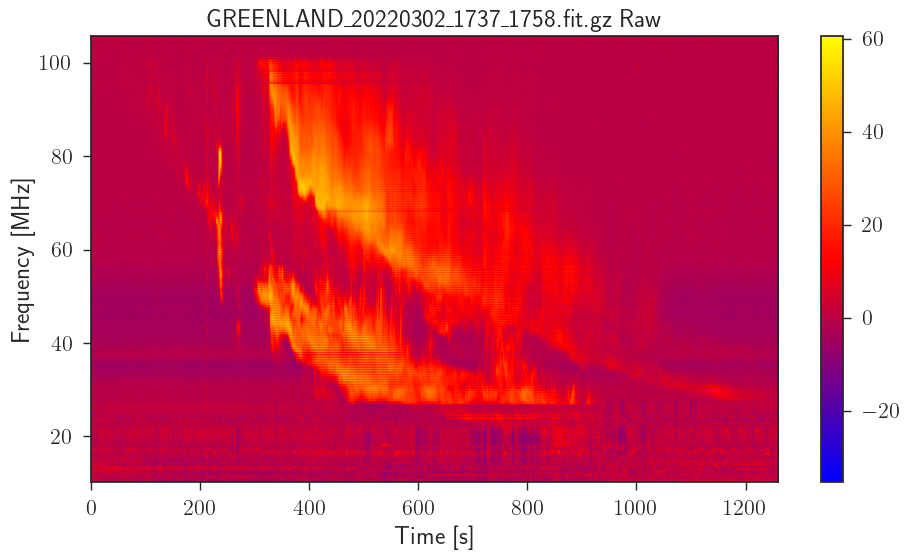

In [6]:
extent = [0, time[-1], freqs[-1], freqs[0]]
vmin = data.min()
vmax = data.max()

print(extent)
plt.imshow(data, aspect='auto', extent=extent,cmap=custom_cmap, vmin=vmin, vmax=vmax)
plt.xlabel('Time [s]')
plt.ylabel('Frequency [MHz]')
plt.title(filename+' Raw')
plt.colorbar()
#plt.savefig('/Users/saan/Desktop/Academic/Research/Data/Selected Data/Type II/Images/Raw/' + 'R_' + filename + '.png')
plt.show()


-35.94146825396825 55.114285714285714


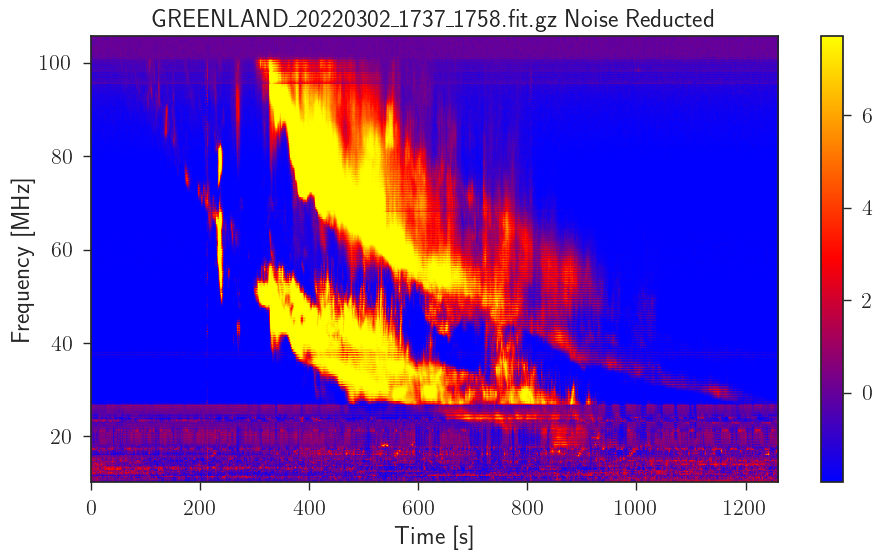

In [7]:
data = data - data.mean(axis=1, keepdims=True)
vmin = data.min()
vmax = data.max()
print(vmin,vmax)
data = data.clip(-5,20)
data = data * 2500.0 / 255.0 / 25.4


plt.imshow(data, aspect='auto', extent=extent,cmap=custom_cmap)
plt.xlabel('Time [s]')
plt.ylabel('Frequency [MHz]')
plt.title(filename+' Noise Reducted')
plt.colorbar()
#plt.savefig('/Users/saan/Desktop/Academic/Research/Data/Selected Data/Type II/Images/Noise Reducted/' + 'NR_' + filename + '.png')
plt.show()

# Applying Noise Filter

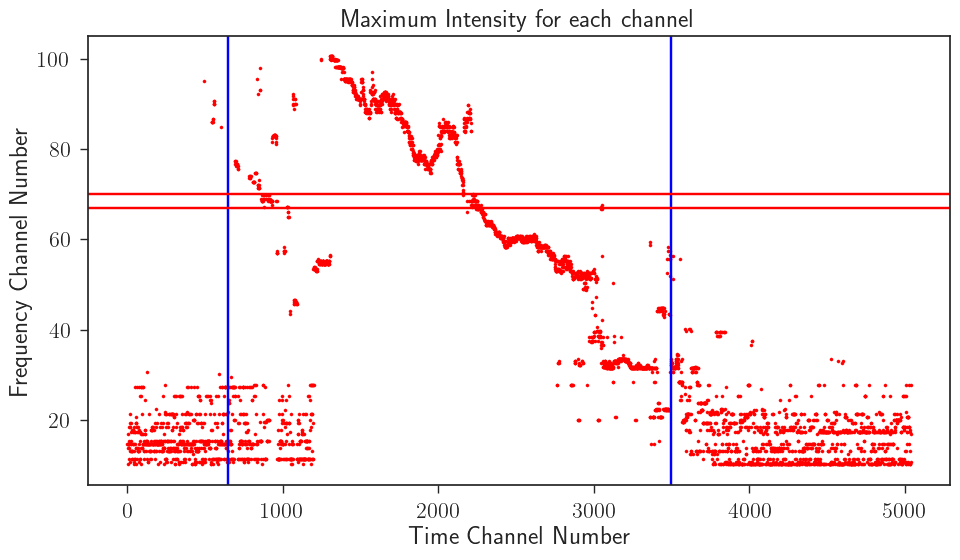

In [8]:
max_intensity_freqs = freqs[np.argmax(data, axis=0)]
time_channel_number = np.linspace(0,5040,5040)
plt.scatter(time_channel_number,max_intensity_freqs,marker="o", s=5, color = 'red')
plt.axvline(x = 650, color = 'b', label = 'axvline - full height')
plt.axvline(x = 3500, color = 'b', label = 'axvline - full height')
plt.axhline(y = 67, color = 'r', linestyle = '-') 
plt.axhline(y = 70, color = 'r', linestyle = '-')
plt.xlabel('Time Channel Number')
plt.ylabel('Frequency Channel Number')
plt.title('Maximum Intensity for each channel')
#plt.savefig('/Users/saan/Desktop/Academic/Research/Data/Selected Data/Type II/Images/Maximum Intensity Raw/' + 'MIR_' + filename + '.png')
plt.show()


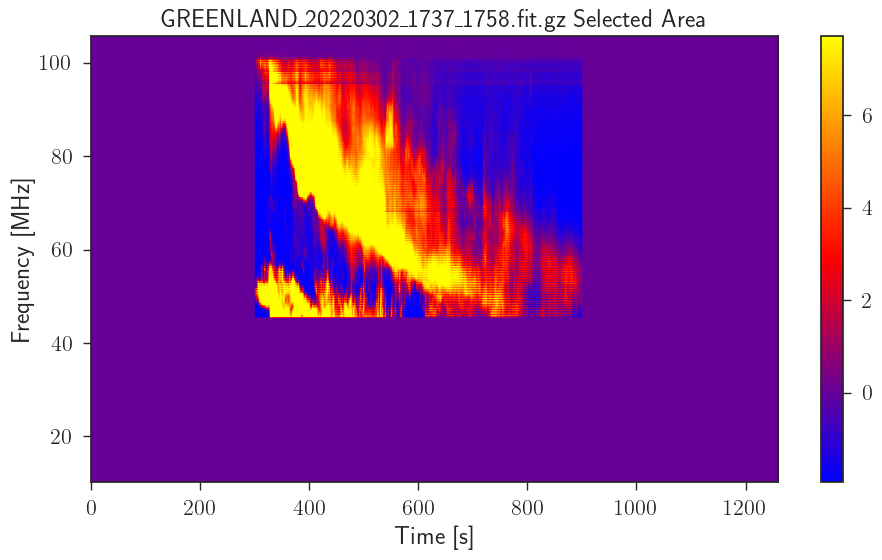

In [9]:
data_new = data

start_row, end_row = 0, 230
start_col, end_col = 1200, 3600

cropped_data = np.copy(data_new)

cropped_data[:start_row, :] = 0
cropped_data[end_row:, :] = 0
cropped_data[:, :start_col] = 0
cropped_data[:, end_col:] = 0


plt.imshow(cropped_data, aspect='auto', extent=extent,cmap=custom_cmap)
plt.xlabel('Time [s]')
plt.ylabel('Frequency [MHz]')
plt.title(filename+' Selected Area')
plt.colorbar()
#plt.savefig('/Users/saan/Desktop/Academic/Research/Data/Selected Data/Type II/Images/Selected Area/' + 'SA_' + filename + '.png')
plt.show()

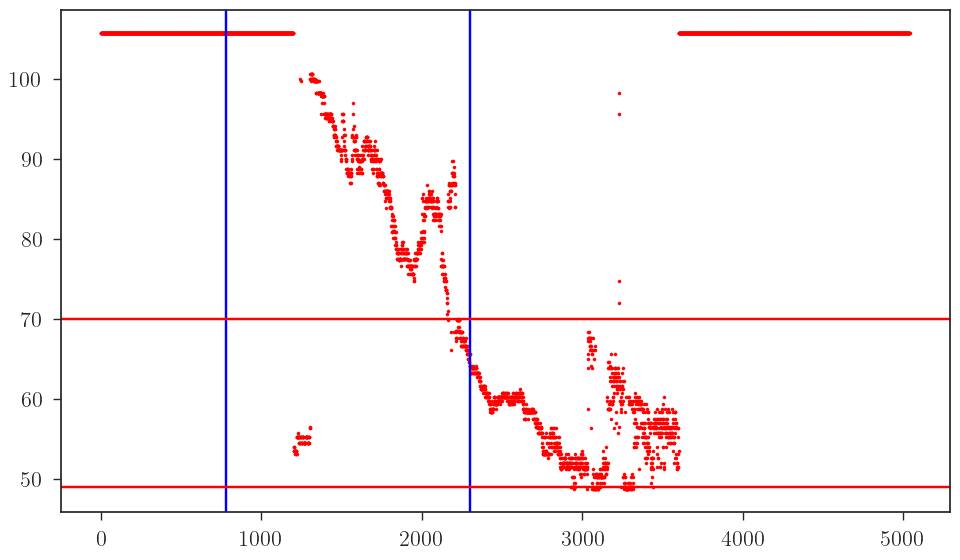

In [10]:
max_intensity_freqs = freqs[np.argsort(cropped_data, axis=0)[-6]]
max_intensity_freqs = freqs[np.argmax(cropped_data, axis=0)]
time_channel_number = np.linspace(0,5040,5040)
plt.scatter(time_channel_number,max_intensity_freqs,marker="o", s=5, color = 'red')
plt.axvline(x = 2300, color = 'b', label = 'axvline - full height')
plt.axvline(x = 780, color = 'b', label = 'axvline - full height')
plt.axhline(y = 49, color = 'r', linestyle = '-') 
plt.axhline(y = 70, color = 'r', linestyle = '-')
#plt.savefig('/Users/saan/Desktop/Academic/Research/Data/Selected Data/Type II/Images/Burst selection/' + 'BS_' + filename + '.png')
plt.show()

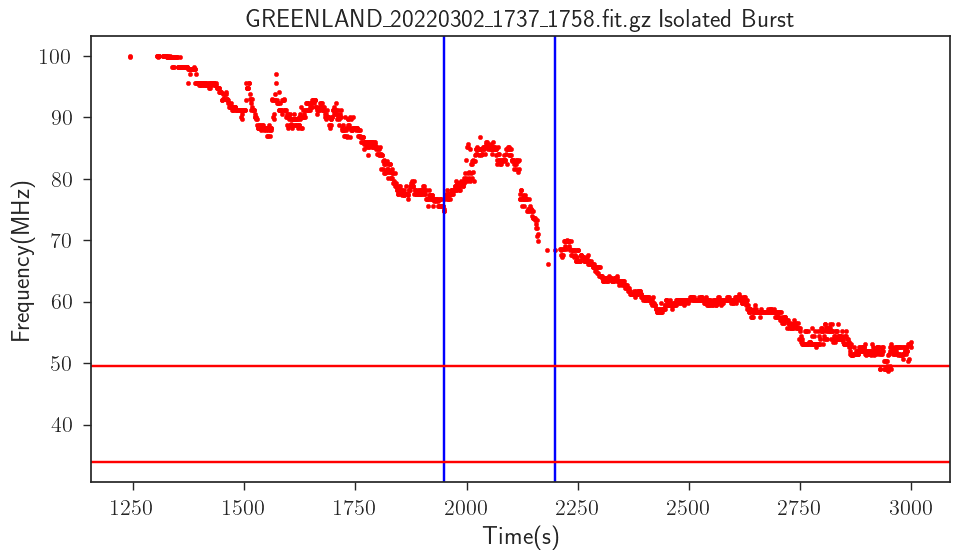

In [11]:
#Filter 1
x_min_1 = -1
x_max_1 = 6000
y_min_1 = 100
y_max_1 = 200

#Filter 2
x_min_2 = 3000
x_max_2 = 6000
y_min_2 = 0
y_max_2 = 200

#Filter 3
x_min_3 = 2150
x_max_3 = 6000
y_min_3 = 80
y_max_3 = 200

#Filter 4
x_min_4 = 0
x_max_4 = 0
y_min_4 = 0
y_max_4 = 0


#Filter 5
x_min_5 = 1000
x_max_5 = 1500
y_min_5 = 50
y_max_5 = 60

#Filter 6
x_min_6 = 0
x_max_6 = 0
y_min_6 = 0
y_max_6 = 0

#Filter 7
x_min_7 = 0
x_max_7 = 0
y_min_7 = 0
y_max_7 = 0

#Filter 8
x_min_8 = 0
x_max_8 = 0
y_min_8 = 0
y_max_8 = 0

#Filter 9
x_min_9 = 0
x_max_9 = 0
y_min_9 = 0
y_max_9 = 0

#Filter 10
x_min_10 = 0
x_max_10 = 0
y_min_10 = 0
y_max_10 = 0

x = time_channel_number
y = max_intensity_freqs

#Filter 1
filtered_indices = np.where(~((x > x_min_1) & (x < x_max_1) & (y > y_min_1) & (y < y_max_1)))

filtered_x = x[filtered_indices]
filtered_y = y[filtered_indices]

#Filter 2
filtered_indices_2 = np.where(~((filtered_x > x_min_2) & (filtered_x < x_max_2) & (filtered_y > y_min_2) & (filtered_y < y_max_2)))

filtered_x2 = filtered_x[filtered_indices_2]
filtered_y2 = filtered_y[filtered_indices_2]

#Filter 3
filtered_indices_3 = np.where(~((filtered_x2 > x_min_3) & (filtered_x2 < x_max_3) & (filtered_y2 > y_min_3) & (filtered_y2 < y_max_3)))

filtered_x3 = filtered_x2[filtered_indices_3]
filtered_y3 = filtered_y2[filtered_indices_3]

#Filter 4
filtered_indices_4 = np.where(~((filtered_x3 > x_min_4) & (filtered_x3 < x_max_4) & (filtered_y3 > y_min_4) & (filtered_y3 < y_max_4)))

filtered_x4 = filtered_x3[filtered_indices_4]
filtered_y4 = filtered_y3[filtered_indices_4]

#Filter 5
filtered_indices_5 = np.where(~((filtered_x4 > x_min_5) & (filtered_x4 < x_max_5) & (filtered_y4 > y_min_5) & (filtered_y4 < y_max_5)))

filtered_x5 = filtered_x4[filtered_indices_5]
filtered_y5 = filtered_y4[filtered_indices_5]

#Filter 6
filtered_indices_6 = np.where(~((filtered_x5 > x_min_6) & (filtered_x5 < x_max_6) & (filtered_y5 > y_min_6) & (filtered_y5 < y_max_6)))

filtered_x6 = filtered_x5[filtered_indices_6]
filtered_y6 = filtered_y5[filtered_indices_6]

#Filter 7
filtered_indices_7 = np.where(~((filtered_x6 > x_min_7) & (filtered_x6 < x_max_7) & (filtered_y6> y_min_7) & (filtered_y6 < y_max_7)))

filtered_x7 = filtered_x6[filtered_indices_7]
filtered_y7 = filtered_y6[filtered_indices_7]

#Filter 8
filtered_indices_8 = np.where(~((filtered_x7 > x_min_8) & (filtered_x7 < x_max_8) & (filtered_y7> y_min_8) & (filtered_y7 < y_max_8)))

filtered_x8 = filtered_x7[filtered_indices_8]
filtered_y8 = filtered_y7[filtered_indices_8]

#Filter 9
filtered_indices_9 = np.where(~((filtered_x8 > x_min_9) & (filtered_x8 < x_max_9) & (filtered_y8> y_min_9) & (filtered_y8 < y_max_9)))

filtered_x9 = filtered_x8[filtered_indices_9]
filtered_y9 = filtered_y8[filtered_indices_9]

#Filter 10
filtered_indices_10 = np.where(~((filtered_x9 > x_min_10) & (filtered_x9 < x_max_10) & (filtered_y9> y_min_10) & (filtered_y9 < y_max_10)))

filtered_x10 = filtered_x9[filtered_indices_10]
filtered_y10 = filtered_y9[filtered_indices_10]

time_new = filtered_x10*0.25

# Creating scatter plot without the filtered points
plt.figure(figsize=(10, 6))
plt.scatter(filtered_x10, filtered_y10,marker="o", s=10, color = 'red')
#plt.scatter(time_new, filtered_y10,marker="o", s=10, color = 'red')
plt.axvline(x = 2200, color = 'b', label = 'axvline - full height')
plt.axvline(x = 1950, color = 'b', label = 'axvline - full height')
plt.axhline(y = 34, color = 'r', linestyle = '-') 
plt.axhline(y =49.6, color = 'r', linestyle = '-')
plt.ylabel('Frequency(MHz)')
plt.xlabel('Time(s)')
plt.title(filename +' Isolated Burst')
#plt.savefig('/Users/saan/Desktop/Academic/Research/Data/Selected Data/Type II/Images/Isolated Burst/' + 'IB_' + filename + '.png')
plt.show()

In [12]:
max_intensity_data = np.column_stack((time_new, filtered_y10))

file_name = '/Users/saan/Desktop/Academic/Research/Data/Selected Data/Type II/Data CSV/Harmonic Frequencies/'+ 'Harmonic_' + filename + '.csv'
#file_name = '/Users/saan/Desktop/Academic/Research/Data/Selected Data/Type II/Data CSV/Fundemental Frequencies/'+ 'Fundamental_' + filename + '.csv'
with open(file_name, 'w', newline='') as csvfile:
    csvwriter = csv.writer(csvfile)
    csvwriter.writerow(['time', 'frequency'])
    csvwriter.writerows(max_intensity_data)